# Homework IV - Machine Learning
### ist1103000, Pedro Lima     ; ist1103179, Diogo Costa (Group 029)

#### II. Programming
### 1)

In [1]:
import pandas as pd
from scipy.io.arff import loadarff

import warnings
warnings.filterwarnings("ignore")

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [2]:
from sklearn import metrics, cluster
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def purity_score(y_true, y_pred):
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

X = df.drop("class", axis=1)
y = df["class"]
X_normalized = MinMaxScaler().fit_transform(X)
kmeans_list = []

for k in [2, 3, 4, 5]:
    print("k =", k)
    kmeans = cluster.KMeans(n_clusters=k, random_state=0).fit(X_normalized)
    kmeans_list.append(kmeans)
    print("\tSilhouette Score =", metrics.silhouette_score(X_normalized, kmeans.labels_))
    print("\tPurity =", purity_score(y, kmeans.labels_))


k = 2
	Silhouette Score = 0.36081773371884557
	Purity = 0.6290322580645161
k = 3
	Silhouette Score = 0.29579055730002257
	Purity = 0.667741935483871
k = 4
	Silhouette Score = 0.2686566721650703
	Purity = 0.6612903225806451
k = 5
	Silhouette Score = 0.24328260038805272
	Purity = 0.6741935483870968


### 2)
#### i.

In [3]:
from sklearn.decomposition import PCA

learnt_pca = PCA(n_components=2)
learnt_pca.fit(X_normalized)
X_trans = learnt_pca.transform(X_normalized)

top2_explained_variance = learnt_pca.explained_variance_ratio_
print(top2_explained_variance[0]+top2_explained_variance[1])

0.77137397434354


#### ii.

In [4]:
labels = list(df.columns)
labels.remove("class")

weights_component1 = list(abs(learnt_pca.components_[0]))
weights_component2 = list(abs(learnt_pca.components_[1]))

input_vars_by_relevance1= [x for _, x in sorted(zip(weights_component1, labels), key=lambda pair: pair[0])]
input_vars_by_relevance2= [x for _, x in sorted(zip(weights_component2, labels), key=lambda pair: pair[0])]

print("Most relevant imput variables by component (in ascending order of importance):")
print("- Component 1:", input_vars_by_relevance1)
print("- Component 2:", input_vars_by_relevance2)

Most relevant imput variables by component (in ascending order of importance):
- Component 1: ['pelvic_radius', 'degree_spondylolisthesis', 'sacral_slope', 'pelvic_tilt', 'lumbar_lordosis_angle', 'pelvic_incidence']
- Component 2: ['degree_spondylolisthesis', 'lumbar_lordosis_angle', 'pelvic_incidence', 'sacral_slope', 'pelvic_radius', 'pelvic_tilt']


### 3)

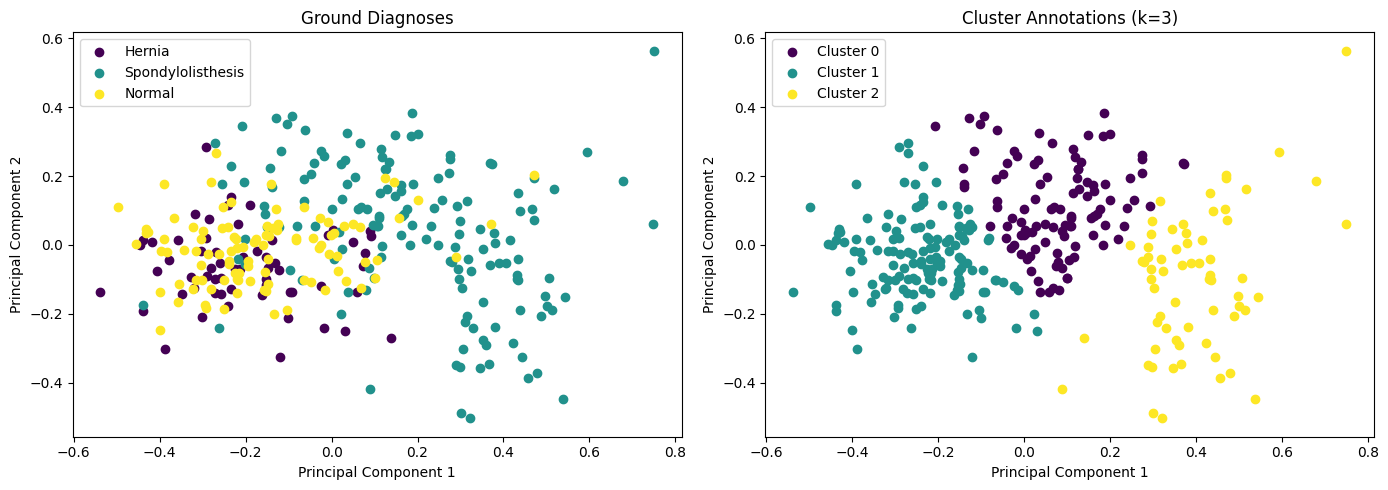

In [5]:
import matplotlib.pyplot as plt

X_2d = X_trans
cluster_labels = kmeans_list[1].labels_

class_labels = df['class'].unique()

colors = plt.cm.viridis(np.linspace(0, 1, len(class_labels)))

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].set_title('Ground Diagnoses')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
for i, label in enumerate(class_labels):
    indices = df['class'] == label
    ax[0].scatter(X_2d[indices, 0], X_2d[indices, 1], label=label, color=colors[i])
ax[0].legend()

ax[1].set_title('Cluster Annotations (k=3)')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
for i in range(len(class_labels)):
    indices = cluster_labels == i
    ax[1].scatter(X_2d[indices, 0], X_2d[indices, 1], label=f'Cluster {i}', color=colors[i])
ax[1].legend()

plt.tight_layout()
plt.show()

### 4)
We can find natural clusters within the population based on the features used for clustering by applying algorithms like K-means to the dataset. These clusters might highlight trends or associations between people who have similar traits. When it comes to health, it's probable that some clusters correspond to people with comparable diseases or risk factors, while other clusters correspond to people who are generally in good health.

Moreover, clustering can be used to divide the population into various groups, each with a distinct health profile. For instance, people with high-risk health profiles may form one cluster, and people with low-risk profiles may form another. Medical professionals may find this segmentation useful as it enables them to customize interventions or treatments for particular population subgroups.